Import the required packages

In [384]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder, StandardScaler


In [385]:
# load the data
df = pd.read_csv("780-testing-2.csv")

In [386]:
df.info() # check the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                780 non-null    object 
 1   fblk                  780 non-null    int64  
 2   nblk                  780 non-null    int64  
 3   anchor_exact_keyword  780 non-null    int64  
 4   anchor_keyword        780 non-null    int64  
 5   pa_score              780 non-null    int64  
 6   ref_dom               780 non-null    int64  
 7   outb_dom              780 non-null    int64  
 8   mon_visits            779 non-null    float64
 9   keywords_ranked_on    780 non-null    int64  
 10  cwvm                  778 non-null    float64
 11  cwvd                  778 non-null    float64
 12  mf                    780 non-null    object 
 13  ssl                   780 non-null    object 
 14  si                    780 non-null    object 
 15  Tlen                  7

In [387]:
df.columns # check the columns
len(df.columns) # check the number of columns

37

In [388]:
# show the first 5 rows of the data
df.head()

,Target,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
0,High SEO,466,957,451,948,79,403,10,1.600000e+07,5000000,...,0,5,1,136,14,90,1,2175,55,23
1,High SEO,60000,10500,40702,44594,98,5300,123,6.700000e+09,327000000,...,1,8,1,1723,642,43,1,7626,137,0
2,High SEO,1800,2400,634,1493,62,805,35,3.900000e+06,191000,...,1,23,9,828,74,57,1,2591,217,8
3,High SEO,968,1300,589,1300,85,466,1,3.310000e+07,5800000,...,0,3,0,62,5,45,1,1318,41,36
4,High SEO,3700,1000,254,761,70,492,6,2.470000e+07,2900000,...,7,48,4,139,49,54,1,2045,103,33


In [389]:
def _preprocess_handle_missing_value(df,inplace=True):
    """Drop the missing values and remove duplicates"""
    if inplace:
        df.dropna(inplace=True)
        df.drop_duplicates(inplace=True)
    else:
        return df.dropna().drop_duplicates()
_preprocess_handle_missing_value(df,inplace=True)


In [390]:
lb = LabelEncoder()
def _preprocess_handle_categories(df,inplace=True):
    """Label encoding for the categorical variables"""
    cat_cols = df.select_dtypes(include=['object']).columns
    if inplace:
        for col in cat_cols:
            df[col] = lb.fit_transform(df[col])
    else:
        return df[cat_cols].apply(lambda x: lb.fit_transform(x))

_preprocess_handle_categories(df,inplace=True)



In [391]:
df.head()

,Target,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
0,0,466,957,451,948,79,403,10,1.600000e+07,5000000,...,0,5,1,136,14,90,1,2175,55,23
1,0,60000,10500,40702,44594,98,5300,123,6.700000e+09,327000000,...,1,8,1,1723,642,43,1,7626,137,0
2,0,1800,2400,634,1493,62,805,35,3.900000e+06,191000,...,1,23,9,828,74,57,1,2591,217,8
3,0,968,1300,589,1300,85,466,1,3.310000e+07,5800000,...,0,3,0,62,5,45,1,1318,41,36
4,0,3700,1000,254,761,70,492,6,2.470000e+07,2900000,...,7,48,4,139,49,54,1,2045,103,33


In [392]:
df['Target'].unique()# get unique values in Target column

array([0, 2, 1])

In [393]:
features = df.drop('Target',axis=1)
features_col = features.columns.values
target = df['Target']
target.unique()


array([0, 2, 1])

In [394]:
features_col

array(['fblk', 'nblk', 'anchor_exact_keyword', 'anchor_keyword',
       'pa_score', 'ref_dom', 'outb_dom', 'mon_visits',
       'keywords_ranked_on', 'cwvm', 'cwvd', 'mf', 'ssl', 'si', 'Tlen',
       'Tkw', 'Mlen', 'Mkw', 'h1', 'h1len', 'h1kw', 'h2', 'h2len', 'h2kw',
       'h3', 'h3len', 'h3kw', 'alt', 'altkw', 'linkin', 'linkout',
       'urllen', 'urlkw', 'txtlen', 'txtkw', 'domain_age'], dtype=object)

In [395]:
# standardize the features
data_norm = features.copy()
scaler = StandardScaler()
data_norm[features_col] = scaler.fit(features).transform(features)

In [396]:
data_norm.head()

,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,cwvm,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
0,-0.068554,-0.062927,-0.063318,-0.067913,0.691753,-0.153091,-0.101704,-0.137811,-0.223395,-0.042090,...,-0.495538,-0.394610,-0.135734,-0.220077,-0.383757,1.274072,0.059869,0.151908,0.236322,0.620740
1,-0.065641,-0.059854,-0.011983,-0.056450,1.487665,0.235470,-0.028914,0.504002,4.063079,1.725673,...,-0.194496,-0.286901,-0.135734,5.332282,8.186333,-0.719750,0.059869,2.498033,1.466770,-1.383099
2,-0.068488,-0.062462,-0.063085,-0.067770,-0.020379,-0.121193,-0.085600,-0.138973,-0.287413,1.082850,...,-0.194496,0.251644,1.912140,2.200989,0.435042,-0.125846,0.059869,0.330955,2.667207,-0.686111
3,-0.068529,-0.062816,-0.063142,-0.067821,0.943094,-0.148092,-0.107501,-0.136169,-0.212745,-0.966147,...,-0.495538,-0.466416,-0.391718,-0.478978,-0.506577,-0.634907,0.059869,-0.216947,0.026245,1.753345
4,-0.068395,-0.062913,-0.063570,-0.067962,0.314742,-0.146029,-0.104281,-0.136975,-0.251350,-0.162619,...,1.611756,1.149219,0.632218,-0.209581,0.093876,-0.253111,0.059869,0.095955,0.956584,1.491975


TSNE

In [397]:
from sklearn.manifold import TSNE 
# fine-tune the hyperparameters
params = {'n_components':2,'perplexity':5,'learning_rate':50,'max_iter':3000,'random_state':42}
tsne = TSNE(**params)


In [398]:
x_tsne = tsne.fit_transform(data_norm[features_col])
kl_div = tsne.kl_divergence_
print(f"KL Divergence: {kl_div}")


KL Divergence: 1.074042797088623


In [399]:
pd.DataFrame(x_tsne,columns=['x','y']).head()

,x,y
0,-7.737341,25.941475
1,17.323126,86.453514
2,-1.635260,41.430992
3,-47.174305,18.374077
4,29.552372,20.336575


In [400]:
y_tsne = target

In [401]:
x_tsne

array([[ -7.737341 ,  25.941475 ],
       [ 17.323126 ,  86.453514 ],
       [ -1.6352596,  41.430992 ],
       ...,
       [-28.920683 , -91.11843  ],
       [-18.876299 , -86.65497  ],
       [-29.279285 , -90.481255 ]], dtype=float32)

Visualization

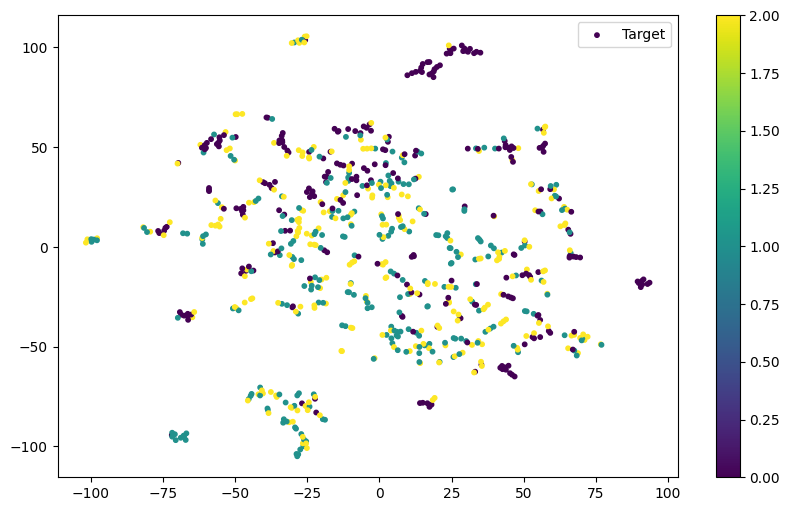

In [408]:
plt.figure(figsize=(10,6))
# plt.scatter(x_tsne[y_tsne == 0, 0], x_tsne[y_tsne == 0, 1], color='red', label='0',marker='o')
# plt.scatter(x_tsne[y_tsne == 1, 0], x_tsne[y_tsne == 1, 1], color='blue', label='1',marker='x')
# plt.scatter(x_tsne[y_tsne == 2, 0], x_tsne[y_tsne == 2, 1], color='green', label='2',marker='*')
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y_tsne,cmap='viridis',label='Target',s=10)
plt.colorbar()
plt.legend()
plt.show()
